# <center> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## Постановка задачи

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе  анализа необходимо:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. Ответить на ключевые вопросы HR-агентства:

    - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
    - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
    - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
    - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.



Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Необходимо продемонстрировать использование разных тестов для проверки статистической значимости сделанных выводов:

тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;

тест для категориальных признаков.

Данные содержат следующие столбцы:
*   *work_year* — год начала работы;
*   *experience_level* — уровень опыта;
*   *employment_type* — тип занятости (FT - полная, PT - частичная, CT - контракт, FL - фриланс);
*   *job_title* — название профессии;
*   *salary* — зарплата;
*   *salary_currency* — валюта зарплаты;
*   *salary_in_usd* — зарплата в USD (доллары США);
*   *employee_residence* — гражданство сотрудника.
*   *remote_ratio* — отношение работы на удаленном доступе к работе в офисе.
*   *company_location* — нахождение компании (страна).
*   *company_size* — размер компании.


Источник датасета: ["Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/mirichoi0218/insurance/)

## Загрузка данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [2]:
# загружаем датасет
data = pd.read_csv('C:/Users/USER/Desktop/Data_info/VS_Studio/EDA-4. Статистические тесты/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [4]:
# смотрим таблицу на не заполненные (пустые) поля
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений).

Проверяем данные на наличие полных дубликатов:

In [5]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
cleaned_data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


In [6]:
# Формируем таблицу по Data Scientist:

data1 = cleaned_data[cleaned_data['job_title']=='Data Scientist']
data1

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
593,593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
596,596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


In [7]:
# Формируем таблицу по Data Engineer:

data2 = cleaned_data[cleaned_data['job_title']=='Data Engineer']
data2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16,16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
22,22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
27,27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
35,35,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L
43,43,2020,MI,FT,Data Engineer,106000,USD,106000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
579,579,2022,SE,FT,Data Engineer,25000,USD,25000,US,100,US,M
582,582,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
583,583,2022,SE,FT,Data Engineer,160080,USD,160080,US,100,US,M
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M


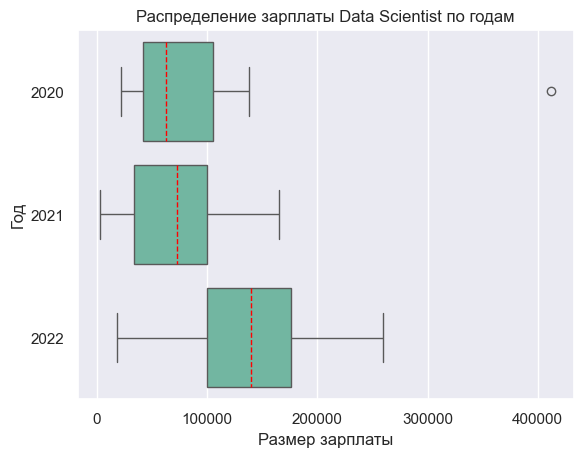

In [8]:
ax = sns.boxplot(data1, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Год')
plt.title('Распределение зарплаты Data Scientist по годам')
plt.show()

In [9]:
data_agg = data1.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты Data Scientist по годам')
data_agg

Распределение зарплаты Data Scientist по годам


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.0,62726.0,105000.0,412000.0
2021,45.0,70671.73,45422.97,2859.0,33808.0,73000.0,100000.0,165000.0
2022,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


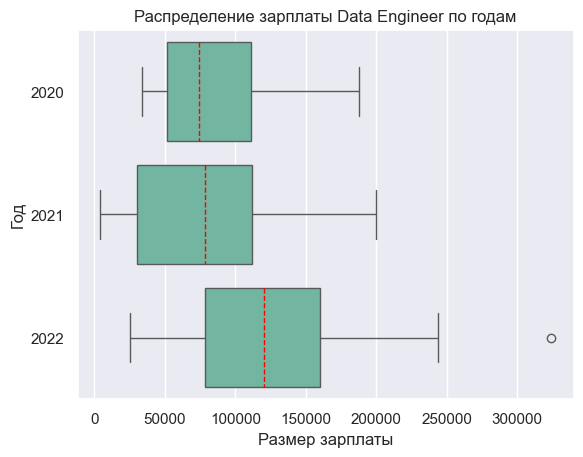

In [10]:
ax = sns.boxplot(data2, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Год')
plt.title('Распределение зарплаты Data Engineer по годам')
plt.show()

In [11]:
data_agg = data2.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты Data Engineer по годам')
data_agg

Распределение зарплаты Data Engineer по годам


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,11.0,88162.00,46473.12,33511.0,51320.5,74130.0,111436.00,188000.0
2021,32.0,83202.53,52926.53,4000.0,29940.0,78416.5,111831.25,200000.0
2022,89.0,126375.70,55954.40,25000.0,78526.0,120000.0,160000.00,324000.0


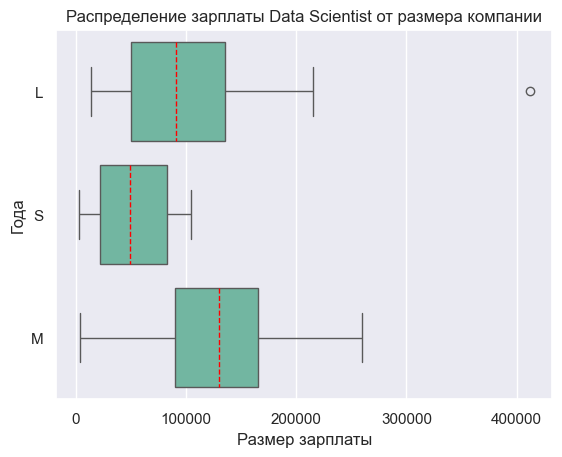

In [12]:
ax = sns.boxplot(data1, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Года')
plt.title('Распределение зарплаты Data Scientist от размера компании')
plt.show()

In [13]:
data_agg = data1.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты Data Scientist от размера компании')
data_agg

Распределение зарплаты Data Scientist от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,45.0,103313.36,71815.18,13400.0,50000.0,90734.0,135000.0,412000.0
M,77.0,126380.75,56389.53,4000.0,90000.0,130000.0,165000.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


In [14]:
# Формируем таблицу по Data Engineer:

data2 = cleaned_data[cleaned_data['job_title']=='Data Engineer']
data2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16,16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
22,22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
27,27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
35,35,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L
43,43,2020,MI,FT,Data Engineer,106000,USD,106000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
579,579,2022,SE,FT,Data Engineer,25000,USD,25000,US,100,US,M
582,582,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
583,583,2022,SE,FT,Data Engineer,160080,USD,160080,US,100,US,M
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M


### Распределение зарплат.

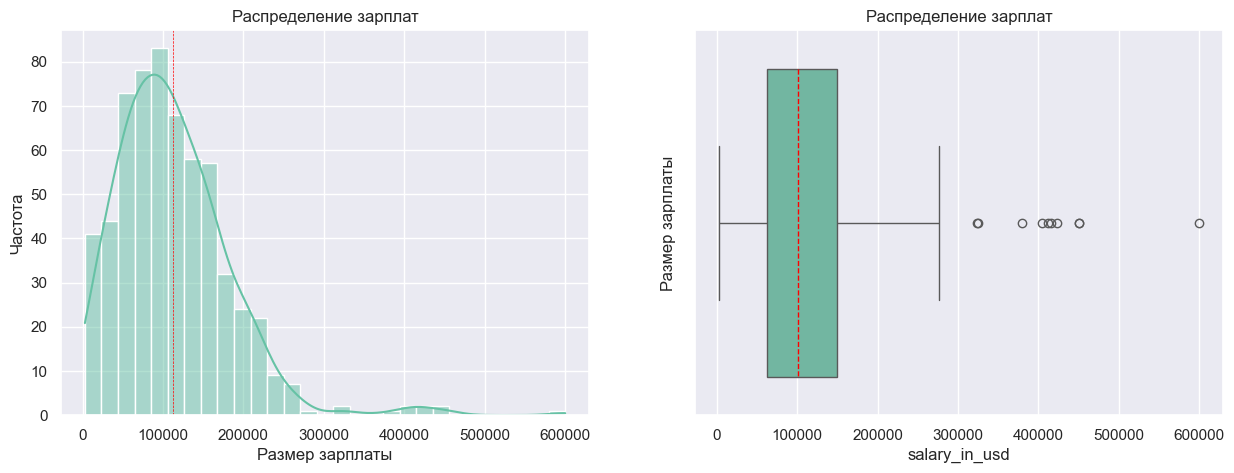

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты', ylabel='Частота')
axes[0].set_title('Распределение зарплат')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.5)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты')
axes[1].set_title('Распределение зарплат')

plt.show()

In [16]:
data_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер зарплаты']
data_agg

,Размер зарплаты
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


Распределение зарплаты отлично от нормального, имеются выбросы.

### Зарплата в зависимости от типа занятости.

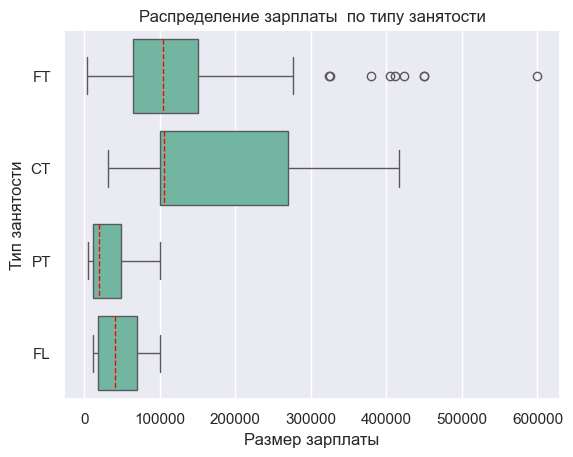

In [17]:
ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Тип занятости')
plt.title('Распределение зарплаты  по типу занятости')
plt.show()

In [18]:
data_agg = data.groupby('employment_type')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты  по типу занятости')
data_agg

Распределение зарплаты  по типу занятости


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.00,105000.0,270000.0,416000.0
FL,4.0,48000.00,40529.82,12000.0,18000.00,40000.0,70000.0,100000.0
FT,588.0,113468.07,69476.47,2859.0,64962.25,104196.5,150000.0,600000.0
PT,10.0,33070.50,31472.91,5409.0,12000.00,18817.5,48370.0,100000.0


Сотрудники которые оформлены на контракт и полный рабочий день, получают значительно больше, чем те - кто
работает на фрилансе или частичная занятость.

### Зарплата в зависимости от размера компании.

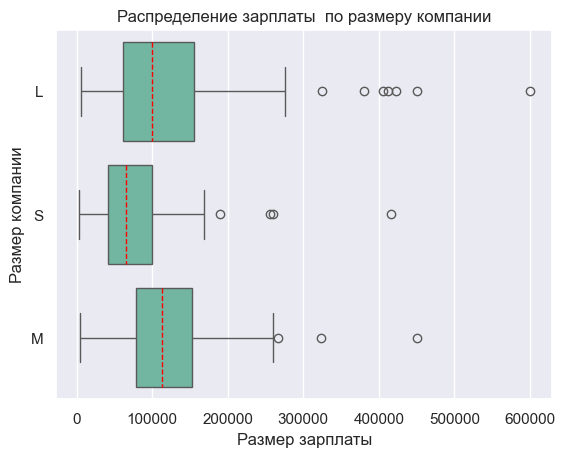

In [19]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплаты', ylabel='Размер компании')
plt.title('Распределение зарплаты  по размеру компании')
plt.show()

In [20]:
data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты  по размеру компании')
data_agg

Распределение зарплаты  по размеру компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0


Наблюдается зависимость зарплаты от размера компании, чем больше компания - тем выше зарплата.

## Статистический анализ данных



In [21]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: зарплата специалистов Data Scientist не отличается от года к году: salary_2020 ($μ_1$), salary_2021 ($μ_2$), salary_2022 ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: зарплата специалистов Data Scientist отличается года к году: salary_2020 ($μ_1$), salary_2021 ($μ_2$), salary_2022 ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [22]:
#значение 3/n

salary_2020 = data1.loc[(data1['work_year']== 2020) & (data1['job_title']=='Data Scientist'),'salary_in_usd']
salary_2021 = data1.loc[(data1['work_year']== 2021) & (data1['job_title']=='Data Scientist'),'salary_in_usd']
salary_2022 = data1.loc[(data1['work_year']== 2022) & (data1['job_title']=='Data Scientist'),'salary_in_usd']


# тест Шапиро-Уилка
print('Для 2020:')

result = stats.shapiro(salary_2020)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Для 20222:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])


Для 2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 20222:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в USD»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [23]:
# проводим тест
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [24]:
salary_2020.median() < salary_2021.median() < salary_2022.median()

True

**Вывод:**

Зарплаты специалистов Data Scientist отличается от года к году (наблюдается рост).

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты Data Scientist ($μ_1$) статистически меньше либо равен зарплате Data Engineer ($μ_2$) в 2022 году.

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплаты Data Scientist ($μ_1$) статистически больше зарплаты Data Engineer ($μ_2$) в 2022 году.

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [25]:
salary_DS = data1.loc[(data1['job_title']=='Data Scientist') & (data['work_year']==2022), 'salary_in_usd']
salary_DE = data2.loc[(data2['job_title']=='Data Engineer') & (data['work_year']==2022), 'salary_in_usd']

# тест Шanupo-Уилка
print('Для DS:')    

result = stats.shapiro(salary_DS)
decision_normality( result [1] )

print('Для DE:')
result = stats.shapiro(salary_DE)
decision_normality( result [1] )


Для DS:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для DE:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни.

**Проведём тест**

In [26]:
# проводим тест
_, p = stats.mannwhitneyu(salary_DE, salary_DS, alternative='greater')
decision_hypothesis(p)

p-value = 0.923
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**

Таким образом можно утверждать, что зарплата Data Scientist была меньше зарплаты Data Engineer в 2022 году.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: зарплаты специалистов Data Scientist не отличается от размеров компаний: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: зарплаты специалистов Data Scientist отличается от размеров компаний: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [27]:
# зраплаты в компаниях различных размеров
S = data1.loc[data1['company_size']=='S', 'salary_in_usd']
M = data1.loc[data1['company_size']=='M', 'salary_in_usd']
L = data1.loc[data1['company_size']=='L', 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для компании раpмера S:')
result = stats.shapiro(S)
decision_normality(result[1])

print('Для компании раpмера M:')
result = stats.shapiro(M)
decision_normality(result[1])

print('Для компании раpмера L:')
result = stats.shapiro(L)
decision_normality(result[1])



Для компании раpмера S:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для компании раpмера M:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для компании раpмера L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в USD»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [28]:
# проводим тест
_, p = stats.kruskal(S, M, L)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

Зарплаты специалистов Data Scientist отличается от размеров компаний.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [29]:
# составляем таблицу сопряжённости
cross_table1 = pd.crosstab(data['job_title'], data['company_size'])

cross_table1

company_size,L,M,S
job_title,,,
3D Computer Vision Researcher,0,1,0
AI Scientist,2,2,3
Analytics Engineer,0,4,0
Applied Data Scientist,5,0,0
Applied Machine Learning Scientist,2,2,0
BI Data Analyst,2,2,2
Big Data Architect,0,1,0
Big Data Engineer,4,2,2
Business Data Analyst,4,1,0


In [30]:
data_agg = data1.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты Data Scientist по размеру компании')
data_agg

Распределение зарплаты Data Scientist по размеру компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,45.0,103313.36,71815.18,13400.0,50000.0,90734.0,135000.0,412000.0
M,77.0,126380.75,56389.53,4000.0,90000.0,130000.0,165000.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


In [31]:
data_agg = data2.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты Data Engineer по размеру компании')
data_agg

Распределение зарплаты Data Engineer по размеру компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,37.0,104255.97,56225.27,20000.0,69741.00,100000.0,150000.00,209100.0
M,89.0,119372.74,58153.33,4000.0,78526.00,115000.0,156600.00,324000.0
S,6.0,66342.50,28862.47,33511.0,47516.75,65511.0,74130.25,115000.0


In [32]:
data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Распределение зарплаты по размеру компании')
data_agg

Распределение зарплаты по размеру компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0


In [33]:
# составляем таблицу сопряжённости
cross_table1 = pd.crosstab(data1['job_title'], data1['company_size'])

cross_table1

# задаём уровень значимости
alpha = 0.05

# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table1)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.373
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


!!!!!
Исходя из полученных данных (статистических), я понимаю, что есть взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании. 
Но, пололностью выполнить данную задачу не смог. Понимаю, что в датасете надо оставить только Engineer и Scientist и потом делать соответ.тест о связи с размерами, но как сделать это практически... (не осилил :)

## Итоговые результаты исследования:

*   Зарплаты специалистов Data Scientist отличается от года к году (наблюдается рост).
*   Таким образом можно утверждать, что зарплата Data Scientist была меньше зарплаты Data Engineer в 2022 году.
*   Зарплаты специалистов Data Scientist отличается от размеров компаний.
*   